## GETTING STARTED

First of all, import all useful libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sq3
import seaborn as sns
import random
%matplotlib inline

.head() function for the csv file would be a good way to get the look and feel of the data. Then look at the shape of data i.e. number of rows and columns. Describing data will also prove beneficial at this stage.

In [2]:
df=pd.read_csv("zomato_clean.csv")
df.head()

,location,listed_type,votes,num_rate,online_order,book_table,cost,cuisine,rest_type
0,Indiranagar,Dine-out,129,3.7,Yes,No,40,South Indian,Quick Bites
1,Indiranagar,Delivery,129,3.7,Yes,No,40,South Indian,Quick Bites
2,Old Airport Road,Delivery,160,3.9,Yes,No,40,South Indian,Quick Bites
3,Domlur,Delivery,108,3.6,Yes,No,40,South Indian,Quick Bites
4,Shivajinagar,Cafes,11,3.7,No,No,50,Cafe,Cafe


In [3]:
df.describe

<bound method NDFrame.describe of                location         listed_type  votes  num_rate online_order  \
0           Indiranagar            Dine-out    129       3.7          Yes   
1           Indiranagar            Delivery    129       3.7          Yes   
2      Old Airport Road            Delivery    160       3.9          Yes   
3                Domlur            Delivery    108       3.6          Yes   
4          Shivajinagar               Cafes     11       3.7           No   
...                 ...                 ...    ...       ...          ...   
16341       Sankey Road            Dine-out    309       4.1           No   
16342      Marathahalli  Drinks & nightlife     53       4.3           No   
16343      Marathahalli            Dine-out     53       4.3           No   
16344       Sankey Road            Dine-out    413       4.3           No   
16345  Old Airport Road            Dine-out    126       4.3           No   

      book_table  cost       cuisine    r

In [4]:
print(df.shape)

(16346, 9)


Now we'll look at instances or occurances of the names of restaurents and note their frequencies to provide an idea of the market.

In [5]:
city_counts = df['location'].value_counts()
print(city_counts)
df.info()

location

Whitefield              1072

HSR                      916

BTM                      882

Marathahalli             876

Indiranagar              845

                        ... 

Central Bangalore          2

West Bangalore             2

Rajarajeshwari Nagar       2

Peenya                     1

Nagarbhavi                 1

Name: count, Length: 92, dtype: int64

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16346 entries, 0 to 16345

Data columns (total 9 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   location      16346 non-null  object 

 1   listed_type   16346 non-null  object 

 2   votes         16346 non-null  int64  

 3   num_rate      16346 non-null  float64

 4   online_order  16346 non-null  object 

 5   book_table    16346 non-null  object 

 6   cost          16346 non-null  int64  

 7   cuisine       16346 non-null  object 

 8   rest_type     16346 non-null  object 

dtypes: float64(1), int64(

## Working with SQL

The next step involved converting the csv file to a db file using SQLiteStudio as there is only so much you can do with csv files in python. Navigating a database using SQL would be more practical. Running a query we look the distinct locations of the restaurants mentioned in the given database. So, we'll create a list in Python which'll have the distinct names of all the locations in the database.

In [6]:
path = 'diners.db'
con = sq3.Connection(path)
cur = con.cursor()
cur.execute ("SELECT DISTINCT location FROM zomato_clean;")
temp_locs = cur.fetchall()
locs = [list(row) for row in temp_locs]
print(locs)
cur.close()

[['Indiranagar'], ['Old Airport Road'], ['Domlur'], ['Shivajinagar'], ['Bannerghatta Road'], ['Electronic City'], ['BTM'], ['JP Nagar'], ['Banashankari'], ['Vijay Nagar'], ['Kammanahalli'], ['Kalyan Nagar'], ['Basavanagudi'], ['Jayanagar'], ['Commercial Street'], ['Brookefield'], ['Marathahalli'], ['Koramangala 4th Block'], ['Frazer Town'], ['HSR'], ['South Bangalore'], ['Koramangala 1st Block'], ['Thippasandra'], ['East Bangalore'], ['HBR Layout'], ['Wilson Garden'], ['Majestic'], ['Malleshwaram'], ['Rajajinagar'], ['New BEL Road'], ['Basaveshwara Nagar'], ['Whitefield'], ['Shanti Nagar'], ['City Market'], ['Bellandur'], ['Ulsoor'], ['Residency Road'], ['Richmond Road'], ['Koramangala 7th Block'], ['Bommanahalli'], ['Koramangala 5th Block'], ['Vasanth Nagar'], ['Jeevan Bhima Nagar'], ['Kumaraswamy Layout'], ['Banaswadi'], ['Ejipura'], ['Yeshwantpur'], ['Jalahalli'], ['Hebbal'], ['Magadi Road'], ['Sarjapur Road'], ['Brigade Road'], ['Koramangala 6th Block'], ['RT Nagar'], ['Kanakapura 

This list acts as a reference pivot as to which locations of Bangalore are being covered by our data and we can further analyse where a potential restaurent might work and which demographic it should most likely cater to so as to make it a profitable venture. Now we look at how many restaurants exist in each of the major 94 locations in Bengalore.

In [7]:
query2 = """SELECT location, COUNT(*) as num
FROM zomato_clean
GROUP BY location
ORDER BY num DESC;"""
cur = con.cursor()
cur.execute (query2)
temp_rests = cur.fetchall()
rests_num = [list(row) for row in temp_rests]
cur.close()

In [8]:
import json
output_file_name = 'location_density.json'
with open(output_file_name, 'w') as outfile:
 json.dump(rests_num, outfile)
print(f'Data saved to {output_file_name} as JSON.')

Data saved to location_density.json as JSON.


A higher number of restaurants may indicate a thriving market for the industry or just a bigger location. Setting up a new restaurant location and determining the cuisine the conditions from a data analyst's perspective:
1. Demographics and Market Analysis: 
Analyze the demographics of the area where you plan to open the restaurant. Consider factors such as age, income levels, cultural diversity, and population density. This data can help you determine the preferences and potential demand for specific cuisines.
2. Competitive Analysis: 
Collect data on existing restaurants in the area, especially those offering similar cuisines. Analyze their menu offerings, pricing, customer reviews, and market share. Identifying gaps in the market can guide your menu selection.
3. Foot Traffic and Location Data: 
Utilize location data to assess foot traffic in the vicinity of potential restaurant locations. Data on foot traffic patterns and nearby attractions can help you choose a high-visibility and high-traffic location.

## POPULATION, DEMOGRAPHICS AND PREFERENCES

In [9]:
query3 = '''SELECT [Medium (P1)], COUNT(*) AS num 
FROM pref
GROUP BY [Medium (P1)]
ORDER BY num DESC;'''
cur = con.cursor()
cur.execute (query3)
temp_pref1 = cur.fetchall()
pref1 = [list(row) for row in temp_pref1]
print(pref1)
cur.close()
query4 = '''SELECT [Medium (P2)], COUNT(*) AS num 
FROM pref
GROUP BY [Medium (P2)]
ORDER BY num DESC;'''
cur = con.cursor()
cur.execute (query4)
temp_pref2 = cur.fetchall()
pref2 = [list(row) for row in temp_pref2]
print(pref2)
cur.close()

[['Food delivery apps', 358], ['Walk-in', 22], ['Direct call', 5], ['Web browser', 3]]

[[' Direct call', 208], [' Walk-in', 104], [' Web browser', 76]]


Clearly many of the people in the city prefer ordering online while approximately 5.7% people would actually prefer a walk-in dining experience. However, the second preference parameters indicate that if Food Delivery apps won't be an option, walk-in dining becomes an option 27% of the demographic prefers.

## RESTAURANT DENSITY

Now, the next step we would take is to take a look at restaurant density via any visualization software so that we get a better idea of the compettion we may face in any particular area. Tableau is used here. We will be extracting a sliver of data which shows the number of restaurants in each location mentioned in the table.

In [10]:
query5 = """SELECT location, COUNT(*) as num, AVG(num_rate) as avg_rate 
FROM zomato_clean
GROUP BY location
ORDER BY num DESC;"""
path = 'diners.db'
con = sq3.Connection(path)
loc_rate = pd.read_sql (query5, con)
print(loc_rate)

                location   num  avg_rate

0             Whitefield  1464  2.668648

1        Electronic City  1219  2.352584

2                    BTM  1190  2.655714

3                    HSR  1180  2.861102

4           Marathahalli  1152  2.716319

..                   ...   ...       ...

89               Kengeri     4  3.700000

90  Rajarajeshwari Nagar     2  3.850000

91     Central Bangalore     2  3.650000

92                Peenya     1  3.200000

93                Jakkur     1  0.000000



[94 rows x 3 columns]


In [11]:
cur = con.cursor()
cur.execute (query5)
loc_den_rate = cur.fetchall()
loc_rate2 = [list(row) for row in loc_den_rate]
cur.close()

Now we check at housing data as well as cost of living to determine the other factors influencing better rated restaurants.

In [12]:
query6 = '''SELECT location, COUNT(*) as num, AVG(price) as avg_price 
FROM housing
GROUP BY location
ORDER BY avg_price DESC;'''
cur = con.cursor()
cur.execute (query6)
housing_data = cur.fetchall()
rent = [list(row) for row in housing_data]
cur.close()

In [13]:
import csv
fields = ['Location', 'Number','Avg_Cost']
with open('new_rent.csv', 'w') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerow(fields)
    csv_writer.writerows(rent)

NOTE: Correlation between tourist hotspots and restaurant density is indicated in the dashboard.

## COST AND AFFORDABILITY

In [14]:
query5 = '''SELECT num_rate, cost
FROM zomato_clean
'''
cur = con.cursor()
cur.execute (query5)
rates = cur.fetchall()
rates_dis = [list(row) for row in rates]
cur.close()

In [15]:
output_file_name = 'rate_num.json'
with open(output_file_name, 'w') as outfile:
 json.dump(rates_dis, outfile)
print(f'Data saved to {output_file_name} as JSON.')

Data saved to rate_num.json as JSON.


## RATING FACTORS ANALYSIS

We observe that the less costlier restaurants usually have a higher rating so we limit our cost for two people to around keeping affordability and customer feedback in mind. Now, we glance at impact of online delivery on ratings.

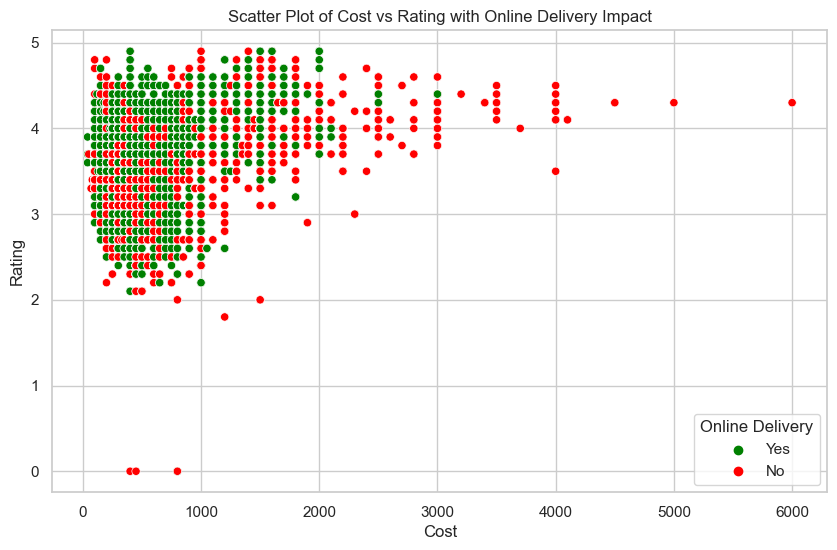

In [16]:
df = pd.read_csv('zomato_clean.csv')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='num_rate', hue='online_order', data=df, palette={'Yes': 'green', 'No': 'red'})
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Scatter Plot of Cost vs Rating with Online Delivery Impact')
plt.legend(title='Online Delivery')
plt.show()

The option of online delivery impacts the rating in lower cost ranges, however the impact is less profound for higher cost ranges. It is important to note that during data cleaning, many values were eliminated such that the instances with null values in online delivery field were eliminated. These graphs reinforce that for costs ranging from 800 to 1500 for two people have the best reviews.

In [17]:
con = sq3.connect('diners.db')
query7 = '''SELECT "listed_type" AS category, AVG(num_rate) as avg_rating
FROM zomato_clean
GROUP BY category;'''
df = pd.read_sql_query(query7, con)

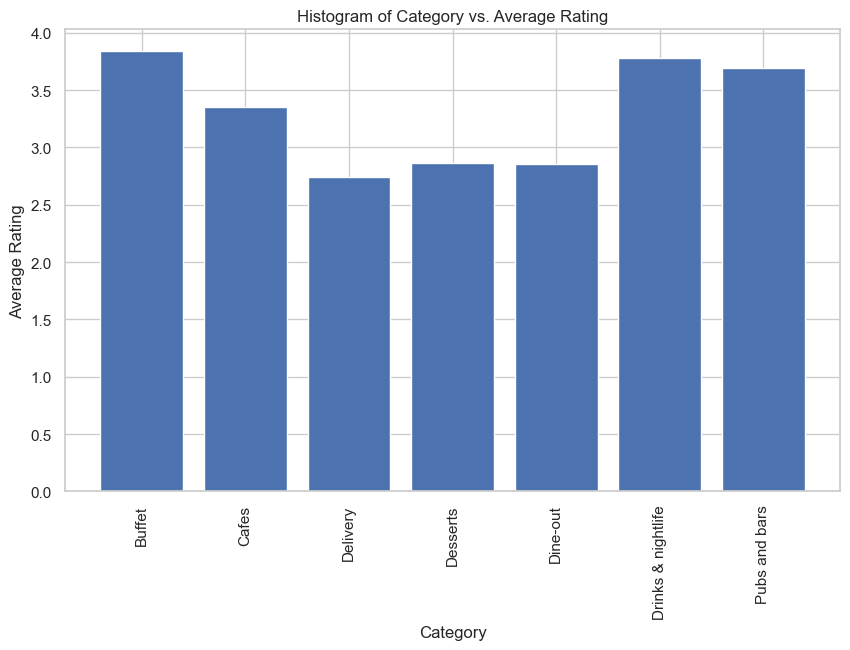

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(df['category'], df['avg_rating'])
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Histogram of Category vs. Average Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [19]:
query9 = '''SELECT "listed_type" AS category, AVG(num_rate) AS rating, location
FROM zomato_clean
GROUP BY category, location;
'''
df = pd.read_sql_query(query9, con)

In [1]:
%%html
<div class='tableauPlaceholder' id='viz1700150447155' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;zo&#47;zomato_clean_viz&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='zomato_clean_viz&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;zo&#47;zomato_clean_viz&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1700150447155');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1277px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Dashboard Access: https://public.tableau.com/views/zomato_clean_viz/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

## OTHER DISTRIBUTIONS

In [21]:
df = pd.read_csv("zomato_clean.csv")

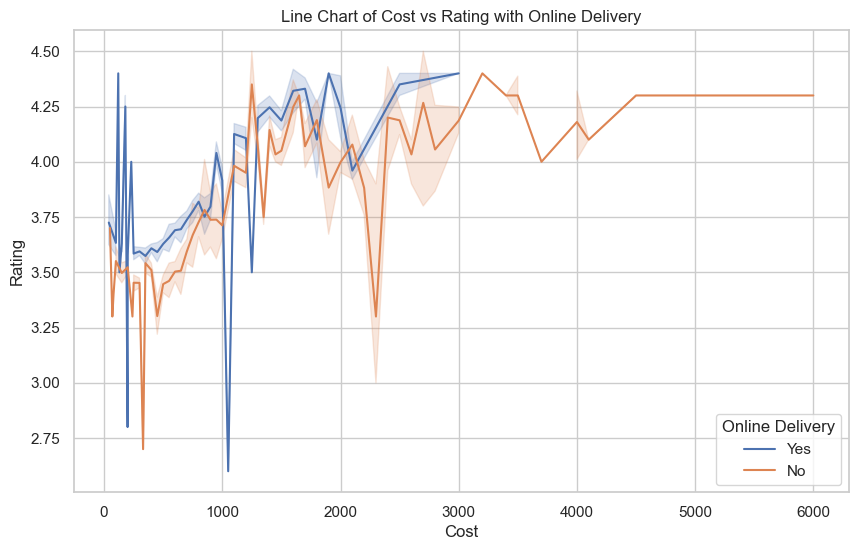

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='cost', y='num_rate', hue='online_order', data=df, marker='')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Line Chart of Cost vs Rating with Online Delivery')
plt.legend(title='Online Delivery')
plt.show()

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight

  self._figure.tight_layout(*args, **kwargs)


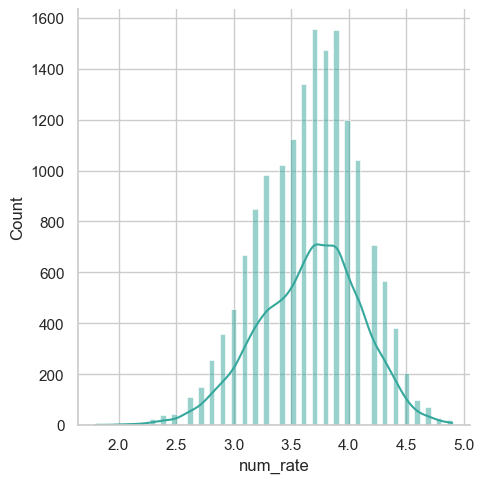

In [23]:
df_updated = df[(df['num_rate']>0)]
sns.displot(df_updated['num_rate'], kde = True, color = '#35a79c')

## Decision Tree Basics - This isn't going to work but here goes

In [24]:
df = pd.read_csv("zomato_clean - backup.csv")
random.seed(42)
num_rows = 16757
random_rows = df.sample(n=num_rows, random_state=42)
remaining_rows = df.drop(random_rows.index)
selected_rows_file = 'zomato_train.csv'
remaining_rows_file = 'zomato_test.csv'
random_rows.to_csv(selected_rows_file, index=False)
remaining_rows.to_csv(remaining_rows_file, index=False)


In [25]:
data_train = pd.read_csv("zomato_train.csv")
data_test = pd.read_csv("zomato_test.csv")
data_train.columns

Index(['index', 'name', 'address', 'location', 'listed_type', 'votes',
       'num_rate', 'online_order', 'book_table', 'cuisines', 'rest_type',
       'cost', 'bool_online_order', 'bool_book_table'],
      dtype='object')

In [26]:
from sklearn.tree import DecisionTreeRegressor
y=data_train.num_rate
y_test = data_test.num_rate
feature_names = ['bool_online_order', 'bool_book_table','cost', 'location', 'listed_type']
X_train=data_train[feature_names]
X_test = data_test[feature_names]

The tree will have a problem with text type data as it can only work with numeric data types so to counter that, we can ue encoding and get_dummies() function in the panda library.

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(X_train['location'])

X_train['location'] = label_encoder.transform(X_train['location'])
X_test['location'] = label_encoder.transform(X_test['location'])

C:\Users\PC\AppData\Local\Temp\ipykernel_1388\4034475913.py:6: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['location'] = label_encoder.transform(X_train['location'])

C:\Users\PC\AppData\Local\Temp\ipykernel_1388\4034475913.py:7: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['location'] = label_encoder.transform(X_test['location'])


In [28]:
label_encoder.fit(X_train['listed_type'])

X_train['listed_type'] = label_encoder.transform(X_train['listed_type'])
X_test['listed_type'] = label_encoder.transform(X_test['listed_type'])

C:\Users\PC\AppData\Local\Temp\ipykernel_1388\3570682932.py:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['listed_type'] = label_encoder.transform(X_train['listed_type'])

C:\Users\PC\AppData\Local\Temp\ipykernel_1388\3570682932.py:4: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['listed_type'] = label_encoder.transform(X_test['listed_type'])


In [29]:
zomato_model1 = DecisionTreeRegressor(random_state=1)
zomato_model1.fit(X_train,y)

DecisionTreeRegressor(random_state=1)

In [30]:
predictions = zomato_model1.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(mae)

1.05949559465547


In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(mse)

1.879802530253005


In [33]:
predictions_csv = predictions.reshape(-1, 1)
header = None
with open('predictions1.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    if header:
        csv_writer.writerow(header)
    csv_writer.writerows(predictions_csv)

In [34]:
existing_data = pd.read_csv("zomato_test.csv")

# Assuming you have a new column named 'new_column_data' that you want to add
new_column_data = pd.read_csv("predictions1.csv", header=None, names=['predictions1'])

# Add the new column to the existing data
existing_data['predictions1'] = new_column_data['predictions1']

# Save the updated data to a new CSV file
existing_data.to_csv("zomato_test.csv", index=False)

In [35]:
data_test.columns

Index(['index', 'name', 'address', 'location', 'listed_type', 'votes',
       'num_rate', 'online_order', 'book_table', 'cuisines', 'rest_type',
       'cost', 'bool_online_order', 'bool_book_table'],
      dtype='object')

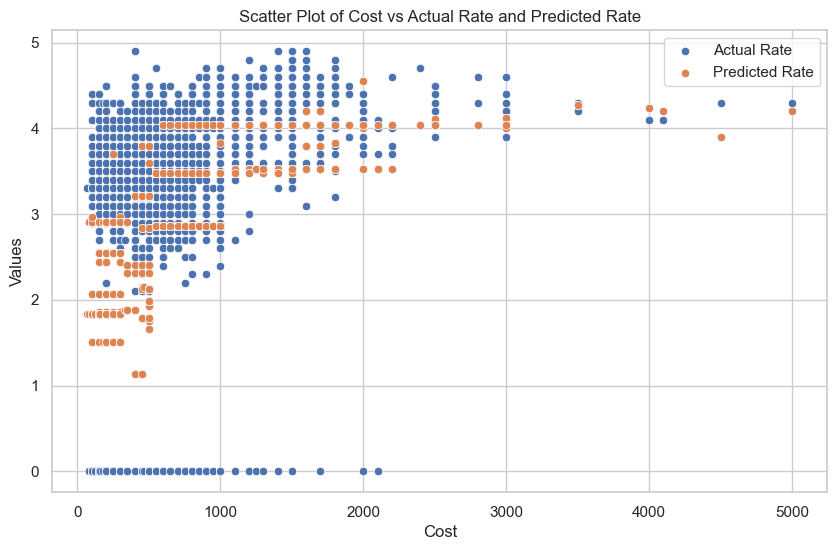

In [36]:
data_test = pd.read_csv('zomato_test.csv')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='num_rate', data=data_test, label='Actual Rate')
sns.scatterplot(x='cost', y='predictions1', data=data_test, label='Predicted Rate')

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Values')
plt.title('Scatter Plot of Cost vs Actual Rate and Predicted Rate')

# Show the legend
plt.legend()
# Show the plot
plt.show()

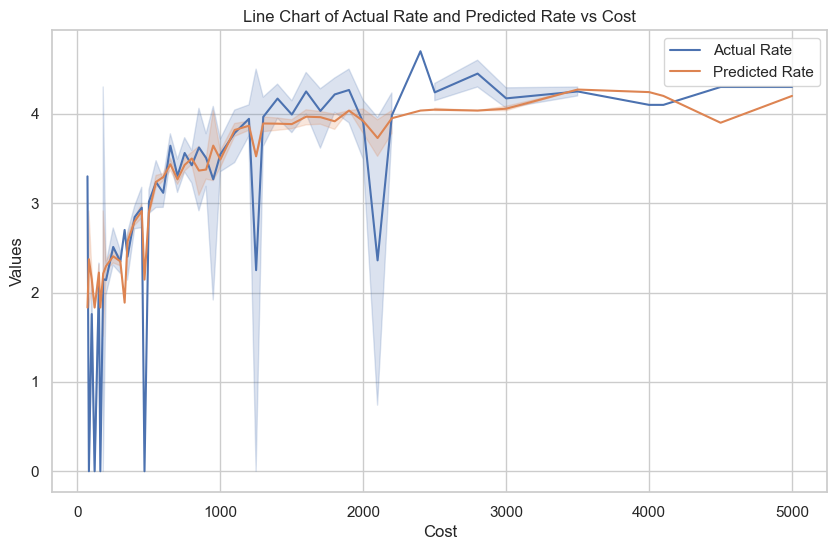

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='cost', y='num_rate', data=data_test, label='Actual Rate', marker='')
sns.lineplot(x='cost', y='predictions1', data=data_test, label='Predicted Rate', marker='')
plt.xlabel('Cost')
plt.ylabel('Values')
plt.title('Line Chart of Actual Rate and Predicted Rate vs Cost')
plt.legend()
plt.show()

We know that a simple Decision Tree Regressor will not suffice for the complicated real world data we have here so we have to look at some other modelling technique. 

## Hist Gradient Boosting Regressor

In [38]:
from sklearn.ensemble import HistGradientBoostingRegressor

Since the model won't accept string or text values, we'll encode them numerically so.

In [39]:
label_encoder = LabelEncoder()
data_train['location'] = label_encoder.fit_transform(data_train['location'])
data_train['listed_type'] = label_encoder.fit_transform(data_train['listed_type'])
data_test['location'] = label_encoder.fit_transform(data_test['location'])
data_test['listed_type'] = label_encoder.fit_transform(data_test['listed_type'])

In [40]:
y_train = data_train.num_rate
y_test = data_test.num_rate
feature_names = ['bool_online_order', 'bool_book_table','cost', 'location', 'listed_type']
X_train =  data_train[feature_names]
X_test = data_test[feature_names]

In [41]:
zomato_model2 = HistGradientBoostingRegressor(random_state=42)
zomato_model2.fit(X_train, y_train)

HistGradientBoostingRegressor(random_state=42)

In [42]:
y_pred = zomato_model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.9008142068907798


In [43]:
predictions_csv = y_pred.reshape(-1, 1)  # Reshape to a column vector
header = None

with open('predictions2.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    if header:
        csv_writer.writerow(header)
    csv_writer.writerows(predictions_csv)

In [44]:
new_column_data = pd.read_csv("predictions2.csv", header=None, names=['predictions2'])
data_test['predictions2'] = new_column_data['predictions2']
data_test.to_csv("zomato_test.csv", index=False)

In [45]:
data_test.columns

Index(['index', 'name', 'address', 'location', 'listed_type', 'votes',
       'num_rate', 'online_order', 'book_table', 'cuisines', 'rest_type',
       'cost', 'bool_online_order', 'bool_book_table', 'predictions1',
       'predictions2'],
      dtype='object')

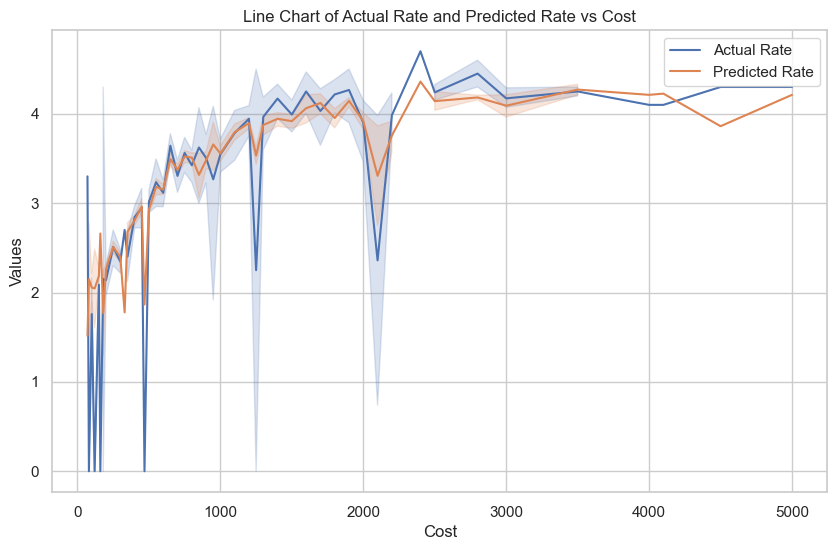

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='cost', y='num_rate', data=data_test, label='Actual Rate', marker='')
sns.lineplot(x='cost', y='predictions2', data=data_test, label='Predicted Rate', marker='')
plt.xlabel('Cost')
plt.ylabel('Values')
plt.title('Line Chart of Actual Rate and Predicted Rate vs Cost')
plt.legend()
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [31, 63, 127]
}
grid_search = GridSearchCV(estimator=zomato_model2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.

  warnings.warn(


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 4}


Grid search is a sequential processes. Each combination is tried one after the other, and the time adds up as the algorithm iterates through the search space. In hyperparameter tuning, multiple models with different hyperparameter combinations need to be trained and evaluated, contributing to the overall time cost.

In [48]:
zomato_model3 = grid_search.best_estimator_

In [49]:
from sklearn.metrics import r2_score

In [50]:
y_pred = zomato_model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Model 3 Mean Squared Error: {mse}')
y_actual = data_test['num_rate'].values
r_squared = r2_score(y_actual, y_pred)
print(f'R-squared: {r_squared}')

Model 3 Mean Squared Error: 1.8959579297324602

R-squared: 0.23126899082653218


In [51]:
predictions_csv = y_pred.reshape(-1, 1)  # Reshape to a column vector
header = None

with open('predictions3.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    if header:
        csv_writer.writerow(header)
    csv_writer.writerows(predictions_csv)

In [52]:
new_column_data = pd.read_csv("predictions3.csv", header=None, names=['predictions3'])
data_test['predictions3'] = new_column_data['predictions3']
data_test.to_csv("zomato_test.csv", index=False)

In [53]:
data_test.columns

Index(['index', 'name', 'address', 'location', 'listed_type', 'votes',
       'num_rate', 'online_order', 'book_table', 'cuisines', 'rest_type',
       'cost', 'bool_online_order', 'bool_book_table', 'predictions1',
       'predictions2', 'predictions3'],
      dtype='object')

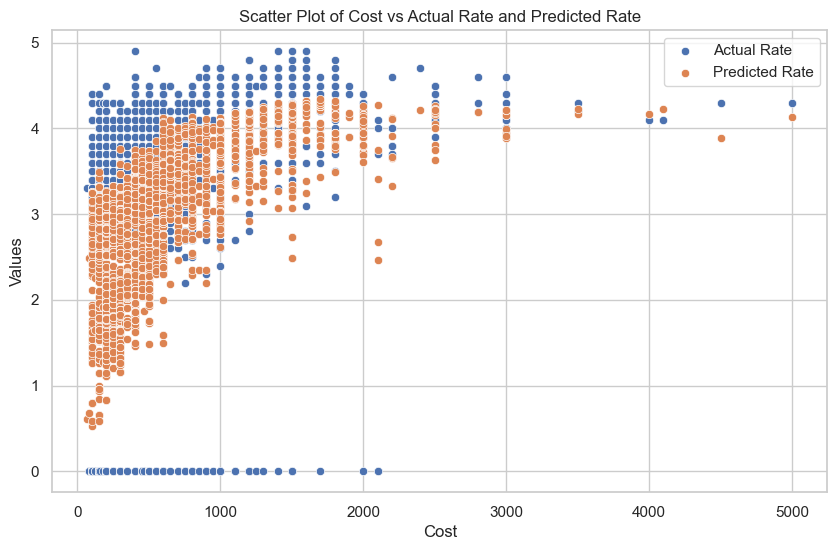

In [54]:
data_test_updated = data_test[(data_test['num_rate']>0)]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='num_rate', data=data_test, label='Actual Rate')
sns.scatterplot(x='cost', y='predictions3', data=data_test, label='Predicted Rate')
plt.xlabel('Cost')
plt.ylabel('Values')
plt.title('Scatter Plot of Cost vs Actual Rate and Predicted Rate')
plt.legend()
plt.show()

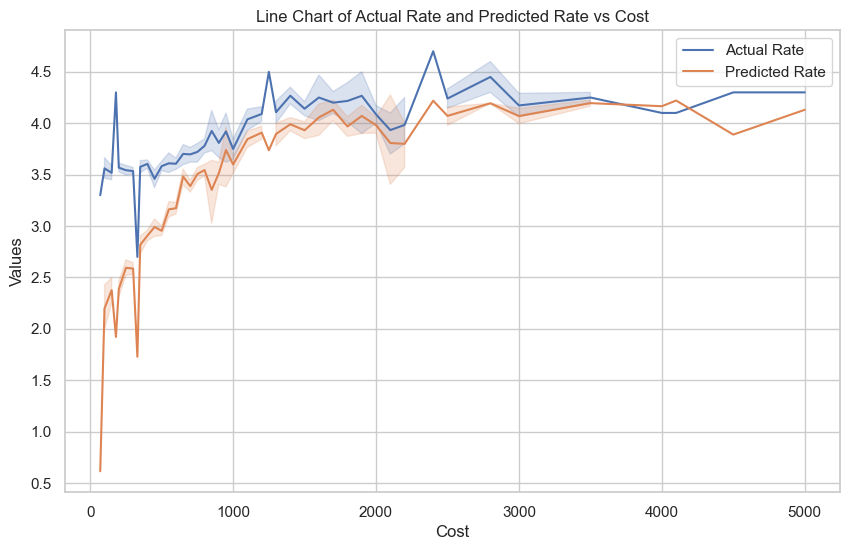

In [55]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='cost', y='num_rate', data=data_test_updated, label='Actual Rate', marker='')
sns.lineplot(x='cost', y='predictions3', data=data_test_updated, label='Predicted Rate', marker='')
plt.xlabel('Cost')
plt.ylabel('Values')
plt.title('Line Chart of Actual Rate and Predicted Rate vs Cost')
plt.legend()
plt.show()

The model is consistently predicting values that are slightly lower than the actual values. We can fix this using feature scaling or hyperparameter tuning.

## Residuals Evaluation

In [56]:
residuals = y_actual - y_pred

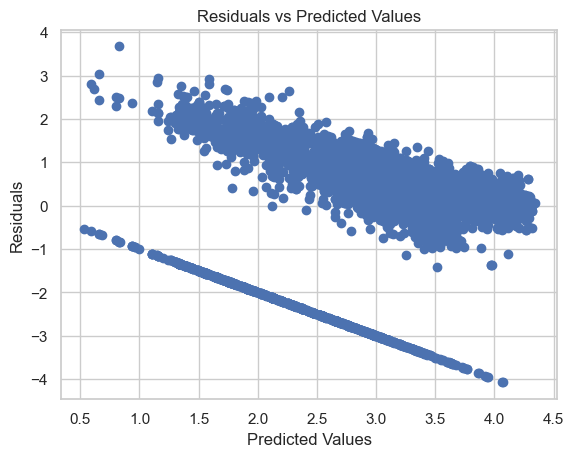

In [57]:
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

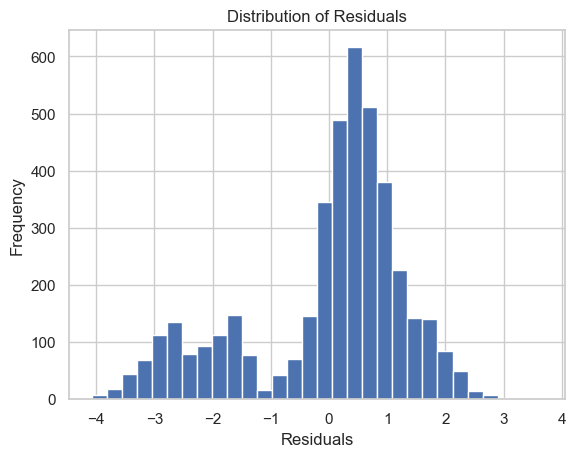

In [58]:
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [59]:
print(f'Mean of Residuals: {residuals.mean()}')
print(f'Standard Deviation of Residuals: {residuals.std()}')

Mean of Residuals: -0.02340465757404778

Standard Deviation of Residuals: 1.3767389555526863


### Trying Logarithmic Transformations on Target Variables

In [60]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [61]:
zomato_model4 = HistGradientBoostingRegressor(random_state=42)
zomato_model4.fit(X_train, y_train_log)

HistGradientBoostingRegressor(random_state=42)

In [62]:
y_pred_log = zomato_model4.predict(X_test)

In [63]:
mse_new = mean_squared_error(y_test_log, y_pred_log)
print(f'Mean Squared Error after logarithmic transformation: {mse_new}')

Mean Squared Error after logarithmic transformation: 0.3296255641104701


In [64]:
y_pred_new = np.expm1(y_pred_log)
r_squared = r2_score(y_actual, y_pred_new)
print(f'R-squared: {r_squared}')

R-squared: 0.15415422286810043


Worse.

In [65]:
predictions_csv = y_pred_new.reshape(-1, 1)  # Reshape to a column vector
header = None

with open('predictions4.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    if header:
        csv_writer.writerow(header)
    csv_writer.writerows(predictions_csv)

In [66]:
new_column_data = pd.read_csv("predictions4.csv", header=None, names=['predictions4'])
data_test['predictions4'] = new_column_data['predictions4']
data_test.to_csv("zomato_test.csv", index=False)

In [67]:
data_test.columns

Index(['index', 'name', 'address', 'location', 'listed_type', 'votes',
       'num_rate', 'online_order', 'book_table', 'cuisines', 'rest_type',
       'cost', 'bool_online_order', 'bool_book_table', 'predictions1',
       'predictions2', 'predictions3', 'predictions4'],
      dtype='object')

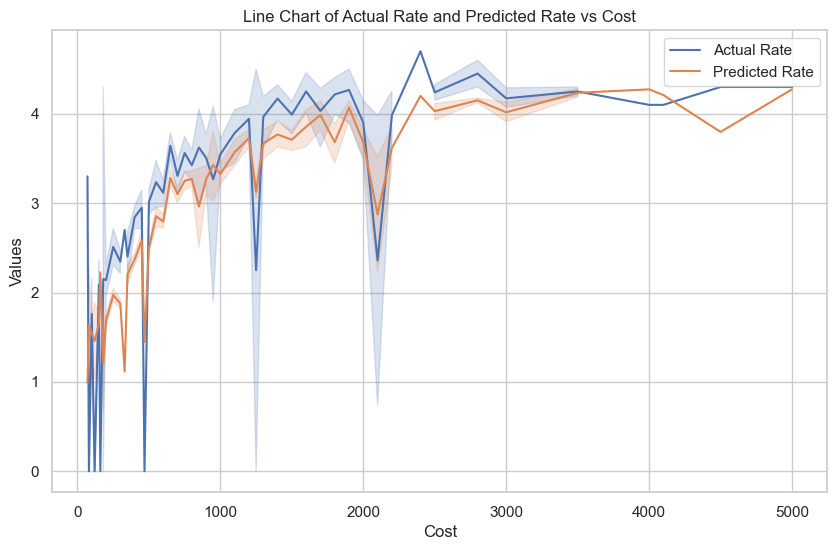

In [68]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='cost', y='num_rate', data=data_test, label='Actual Rate', marker='')
sns.lineplot(x='cost', y='predictions4', data=data_test, label='Predicted Rate', marker='')
plt.xlabel('Cost')
plt.ylabel('Values')
plt.title('Line Chart of Actual Rate and Predicted Rate vs Cost')
plt.legend()
plt.show()

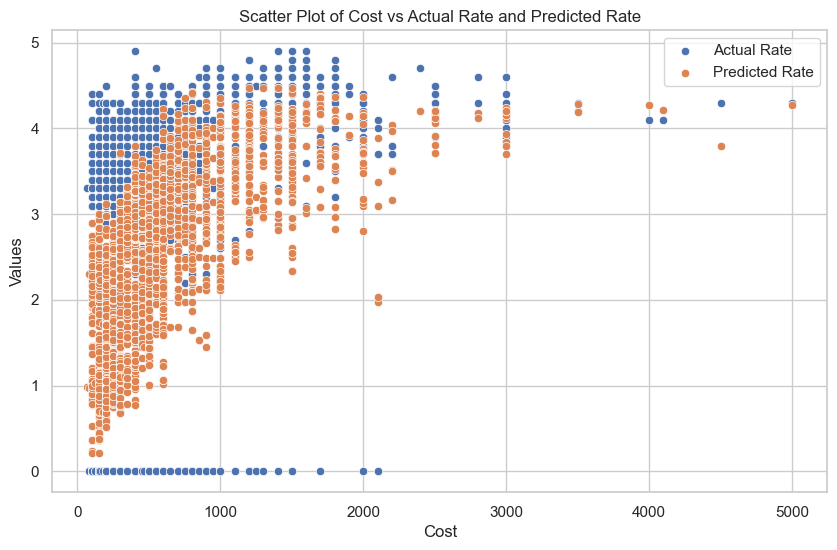

In [69]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='num_rate', data=data_test, label='Actual Rate')
sns.scatterplot(x='cost', y='predictions4', data=data_test, label='Predicted Rate')
plt.xlabel('Cost')
plt.ylabel('Values')
plt.title('Scatter Plot of Cost vs Actual Rate and Predicted Rate')
plt.legend()
plt.show()

In [70]:
from sklearn.inspection import permutation_importance
result = permutation_importance(zomato_model4, X_train, y_train, n_repeats=10, random_state=42)

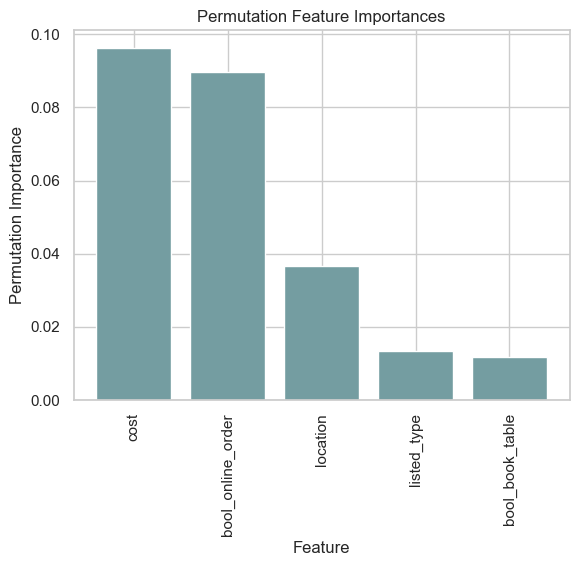

In [71]:
feature_importances = result.importances_mean

sorted_idx = feature_importances.argsort()[::-1]
feature_names = X_train.columns[sorted_idx]

plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], color = '#749da1')
plt.xticks(range(len(feature_importances)), feature_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importances')
plt.show()

## Trying Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv("zomato_clean.csv")
X = df.drop('num_rate', axis=1)
y = df['num_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
df.columns

Index(['location', 'listed_type', 'votes', 'num_rate', 'online_order',
       'book_table', 'cost', 'cuisine', 'rest_type'],
      dtype='object')

In [75]:
label_encoder = LabelEncoder()

def label_encode_column(df, column_name):
    label_encoder = LabelEncoder()
    df[column_name] = label_encoder.fit_transform(df[column_name])
    return label_encoder

columns_to_encode = ['location', 'listed_type', 'rest_type', 'cuisine', 'book_table', 'online_order']

for column in columns_to_encode:
    label_encoder = label_encode_column(X_train, column)
    X_test[column] = label_encoder.transform(X_test[column])


In [76]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.15

R-squared: 0.27


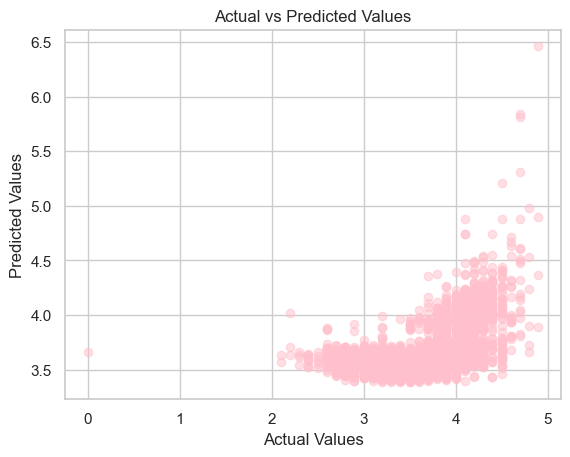

In [77]:
plt.scatter(y_test, y_pred, alpha=0.5, color = 'pink')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

We see that the model is predicting ratings exceeding 5 and we don't want that.

In [78]:
def make_capped_predictions(model, X, cap_value):
    predictions = model.predict(X)
    capped_predictions = np.clip(predictions, a_min=None, a_max=cap_value)
    return capped_predictions

cap_value = 5

y_pred_capped = make_capped_predictions(linear_reg_model, X_test, cap_value)

mse_capped = mean_squared_error(y_test, y_pred_capped)
r2_capped = r2_score(y_test, y_pred_capped)

print(f'Mean Squared Error (Capped): {mse_capped:.2f}')
print(f'R-squared (Capped): {r2_capped:.2f}')

Mean Squared Error (Capped): 0.15

R-squared (Capped): 0.28


We see a good increase in R2 value but we still have to improve the model as it is nowhere near the adequete strength.

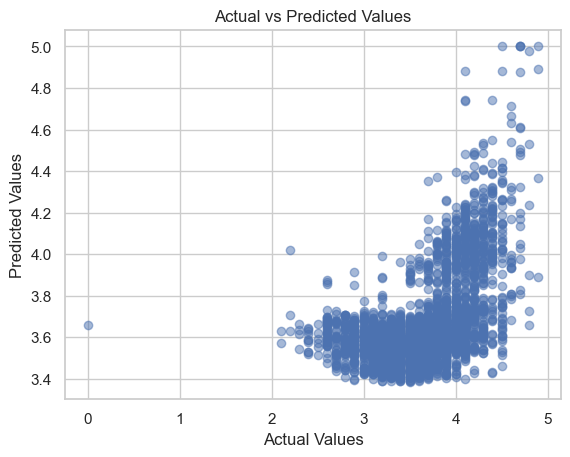

In [79]:
plt.scatter(y_test, y_pred_capped, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

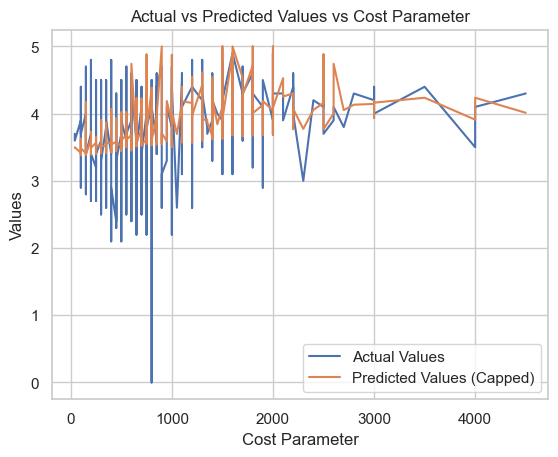

In [80]:
cost = X_test["cost"]
sorted_indices = np.argsort(cost)
cost_values_sorted = np.array(cost)[sorted_indices]
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_capped_sorted = np.array(y_pred_capped)[sorted_indices]

# Line chart
plt.plot(cost_values_sorted, y_test_sorted, label='Actual Values', marker='')
plt.plot(cost_values_sorted, y_pred_capped_sorted, label='Predicted Values (Capped)', marker='')
plt.xlabel('Cost Parameter')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values vs Cost Parameter')
plt.legend()
plt.show()


## Polynomial Regression Attempt

In [82]:
from sklearn.impute import SimpleImputer

numeric_columns = df.select_dtypes(include='number').columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

non_numeric_imputer = SimpleImputer(strategy='constant', fill_value='missing')
df[non_numeric_columns] = non_numeric_imputer.fit_transform(df[non_numeric_columns])

In [100]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
feature_names = ['cost']
poly_feature_names = [f'{col}^{i}' for col in ['cost'] for i in range(2, degree + 1)]

poly = PolynomialFeatures(degree=degree, include_bias=False)
poly_features = poly.fit_transform(df[['cost']])
df_poly = pd.DataFrame(poly_features, columns=feature_names + poly_feature_names)

df_imputed = pd.concat([df.drop(['cost'], axis=1), df_poly], axis=1)

In [101]:
X = df_imputed.drop('num_rate', axis=1)
y = df_imputed['num_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
label_encoder = LabelEncoder()

def label_encode_column(df_imputed, column_name):
    label_encoder = LabelEncoder()
    df_imputed[column_name] = label_encoder.fit_transform(df_imputed[column_name])
    return label_encoder

columns_to_encode = ['location', 'listed_type', 'rest_type', 'cuisine', 'book_table', 'online_order']

for column in columns_to_encode:
    label_encoder = label_encode_column(X_train, column)
    X_test[column] = label_encoder.transform(X_test[column])


In [103]:
zomato_model5 = LinearRegression()
zomato_model5.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = zomato_model5.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.27


### Trying Randomized Search

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_space = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

zomato_model6 = GradientBoostingRegressor()

In [107]:
random_search = RandomizedSearchCV(
    zomato_model6,
    param_distributions=param_space,
    n_iter=100,
    scoring='neg_mean_squared_error', 
    cv=7, 
    random_state=42,
    n_jobs=-1,
)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.3}


In [108]:
zomato_model6 = random_search.best_estimator_
y_pred = zomato_model6.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.62


In [112]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.08


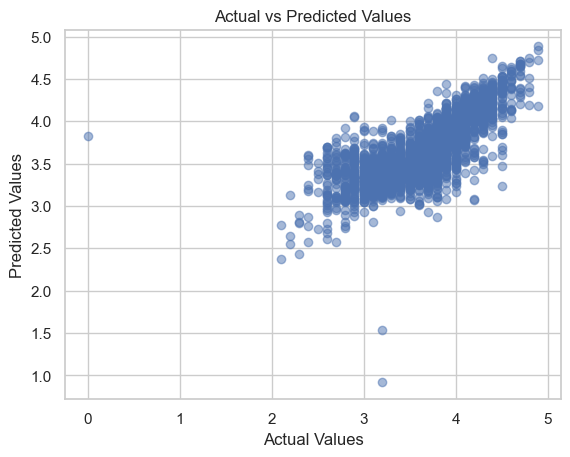

In [109]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

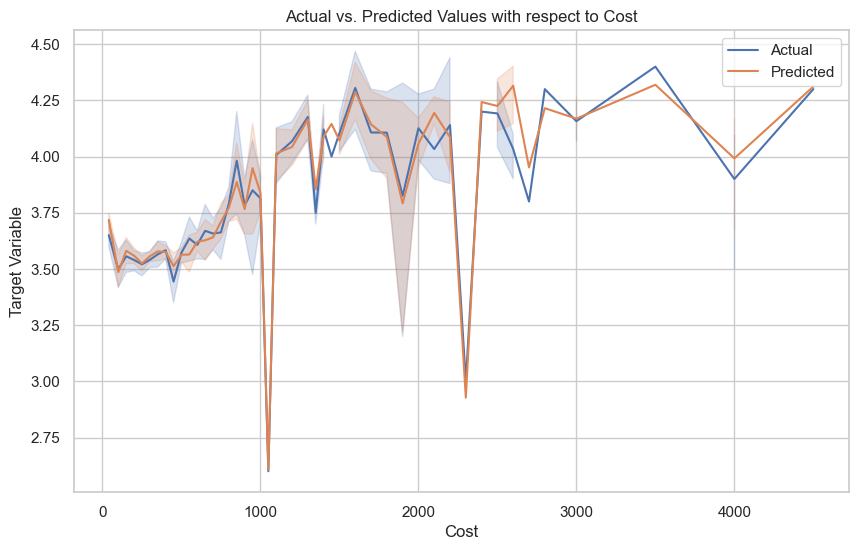

In [113]:
df_plot = pd.DataFrame({
    'Cost': X_test['cost'],
    'Actual': y_test,
    'Predicted': y_pred
})

df_plot = df_plot.sort_values(by='Cost')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Cost', y='Actual', data=df_plot, label='Actual', marker='')
sns.lineplot(x='Cost', y='Predicted', data=df_plot, label='Predicted', marker='')
plt.xlabel('Cost')
plt.ylabel('Target Variable')
plt.title('Actual vs. Predicted Values with respect to Cost')
plt.legend()
plt.show()

## CONCLUSION

This is the conclusion of the project. For last reference, 'zomato_model6' is the in use model with a mean squared error of 0.08 and an r-squared value of 0.62.
The aim of this was to learn and acquire data analysis, interpretation, visualization and basic machine learning regression (predictive) modelling. 
This doesn't mean to express as much as enable learning and effective application.